In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [16]:
# 1. Load IMDB Dataset
max_features = 10000
max_len = 200

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [18]:
# 2. Build GRU Model
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, 
                     input_length=max_len),
                     layers.GRU(64, return_sequences=False),
                     layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/Users/deepak/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs = 10, 
    batch_size = 64
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.7902 - loss: 0.4329 - val_accuracy: 0.8632 - val_loss: 0.3218
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9024 - loss: 0.2468 - val_accuracy: 0.8622 - val_loss: 0.3251
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9331 - loss: 0.1794 - val_accuracy: 0.8612 - val_loss: 0.3374
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.9530 - loss: 0.1279 - val_accuracy: 0.8653 - val_loss: 0.3689
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9708 - loss: 0.0862 - val_accuracy: 0.8668 - val_loss: 0.4598
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9818 - loss: 0.0552 - val_accuracy: 0.8576 - val_loss: 0.5015
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.8640 - val_loss: 0.5575
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9886 - loss: 0.0366 - 

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8458 - loss: 0.6784
Test Accuracy: 0.8458


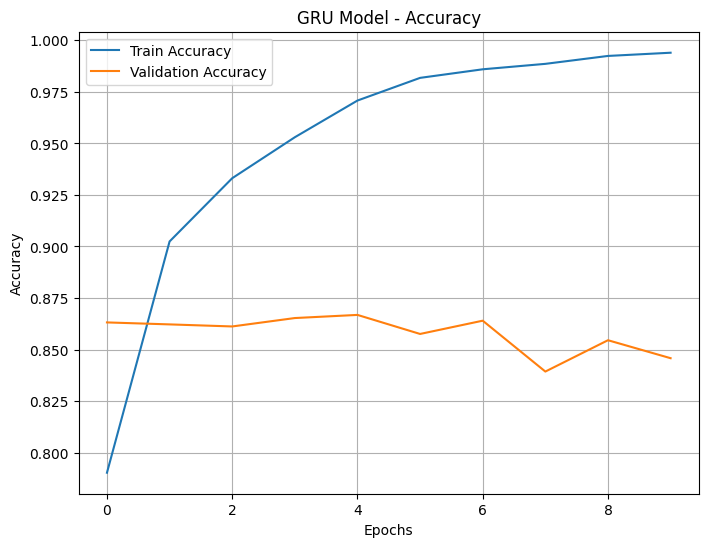

In [21]:
# Plot Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("GRU Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

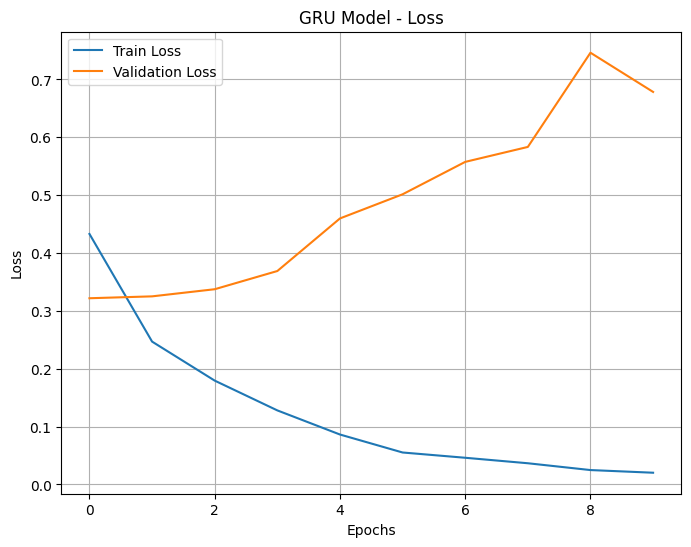

In [22]:
# Plot Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# 8. Sample predictions
# Get predictions for the test set
predictions = model.predict(x_test)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [24]:
# Display some sample predictions
print("Sample Predictions:")
for i in range(10): # Displaying first 10 samples
    print(f"Review {i+1}: True Label = {y_test[i]}, Predicted Label = {predicted_labels[i]}")

Sample Predictions:
Review 1: True Label = 0, Predicted Label = 0
Review 2: True Label = 1, Predicted Label = 1
Review 3: True Label = 1, Predicted Label = 0
Review 4: True Label = 0, Predicted Label = 0
Review 5: True Label = 1, Predicted Label = 1
Review 6: True Label = 1, Predicted Label = 1
Review 7: True Label = 1, Predicted Label = 1
Review 8: True Label = 0, Predicted Label = 0
Review 9: True Label = 0, Predicted Label = 1
Review 10: True Label = 1, Predicted Label = 1


In [25]:
# To display the actual text, you would need the word index,
# which was not loaded. We can add that if needed.

# 9. Generate predictions for the entire test set
# Predictions were already generated in the previous cell and stored in predicted_labels

# Flatten true labels
y_true = y_test # y_test is already a numpy array of true labels

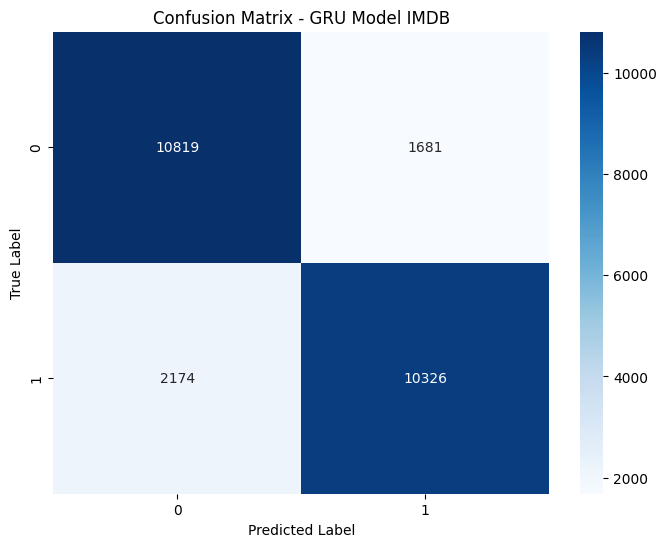

In [26]:
# 10. Confusion Matrix
cm = confusion_matrix(y_true, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Removed xticklabels and yticklabels as class_names is not available
plt.title("Confusion Matrix - GRU Model IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
